Plot multiple runs to see how truly sensitive everything is to parameter settings.

In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nengo
%matplotlib inline

from nengo_learn_assoc_mem.paths import data_path

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [36]:
read_path = os.path.join(data_path, "mixed_mean")

In [37]:
fan1_resp = []
fan2_resp = []
foil1_resp = []
foil2_resp = []

for seed_val in range(10):
    with h5py.File(os.path.join(read_path, f"mixed_voja_more_neurons_{seed_val}.h5"), "r") as fi:
        fan1_resp.append(np.array(fi["resp/fan1"]))
        fan2_resp.append(np.array(fi["resp/fan2"]))
        foil1_resp.append(np.array(fi["resp/foil1"]))
        foil2_resp.append(np.array(fi["resp/foil2"]))

In [38]:
len(fan1_resp)

10

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


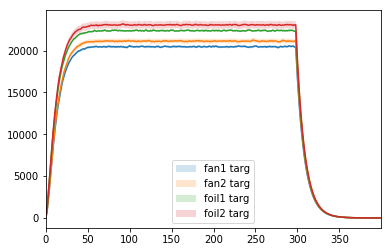

In [39]:
sns.tsplot(fan1_resp, color="C0")
sns.tsplot(fan2_resp, color="C1")
sns.tsplot(foil1_resp, color="C2")
sns.tsplot(foil2_resp, color="C3")

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


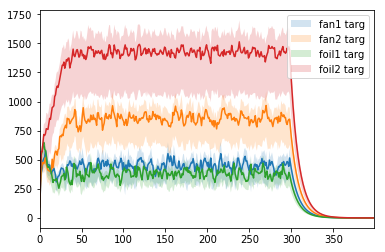

In [40]:
sns.tsplot(fan1_resp, color="C0", estimator=np.std)
sns.tsplot(fan2_resp, color="C1", estimator=np.std)
sns.tsplot(foil1_resp, color="C2", estimator=np.std)
sns.tsplot(foil2_resp, color="C3", estimator=np.std)

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

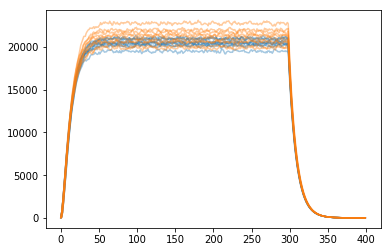

In [18]:
plt.plot(np.array(fan1_resp).T, alpha=0.4, color="C0")
plt.plot(np.array(fan2_resp).T, alpha=0.4, color="C1")

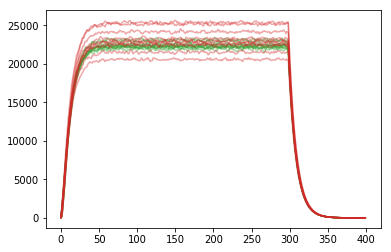

In [19]:
plt.plot(np.array(foil1_resp).T, alpha=0.4, color="C2")
plt.plot(np.array(foil2_resp).T, alpha=0.4, color="C3")

In [20]:
filt = nengo.Lowpass(0.01)

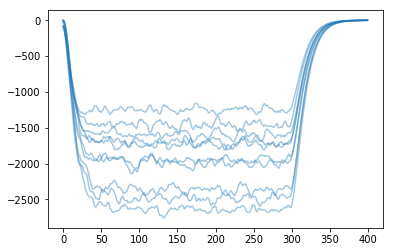

In [21]:
for f1, f2 in zip(fan1_resp, foil1_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

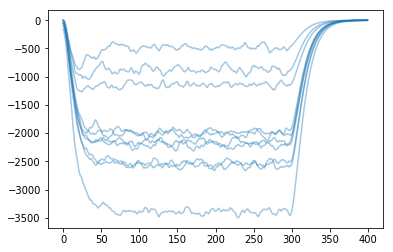

In [22]:
for f1, f2 in zip(fan2_resp, foil2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

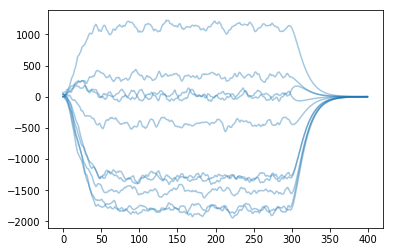

In [23]:
for f1, f2 in zip(fan1_resp, fan2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

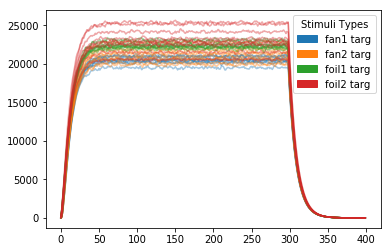

In [24]:
plt.plot(np.array(fan1_resp).T, alpha=0.4, color="C0")
plt.plot(np.array(fan2_resp).T, alpha=0.4, color="C1")
plt.plot(np.array(foil1_resp).T, alpha=0.4, color="C2")
plt.plot(np.array(foil2_resp).T, alpha=0.4, color="C3")

stim_types = ["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"]
leg_handles = [mpatches.Patch(color=f"C{a_i}", label=nm) for a_i, nm in enumerate(stim_types)]

plt.legend(handles=leg_handles, title="Stimuli Types")

In [41]:
read_path = os.path.join(data_path, "mixed_static")

In [42]:
fan1_resp = []
fan2_resp = []
foil1_resp = []
foil2_resp = []

for seed_val in range(10):
    with h5py.File(os.path.join(read_path, f"static_voja_with_dist_{seed_val}.h5"), "r") as fi:
        fan1_resp.append(np.array(fi["resp/fan1"]))
        fan2_resp.append(np.array(fi["resp/fan2"]))
        foil1_resp.append(np.array(fi["resp/foil1"]))
        foil2_resp.append(np.array(fi["resp/foil2"]))

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


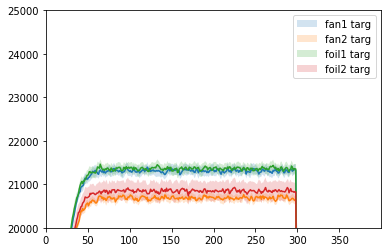

In [13]:
sns.tsplot(fan1_resp, color="C0")
sns.tsplot(fan2_resp, color="C1")
sns.tsplot(foil1_resp, color="C2")
sns.tsplot(foil2_resp, color="C3")

plt.ylim(2e4, 2.5e4)

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


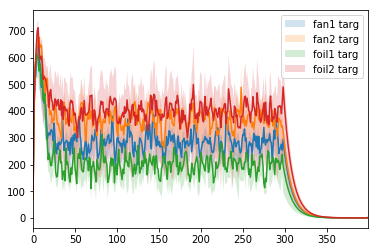

In [44]:
sns.tsplot(fan1_resp, color="C0", estimator=np.std)
sns.tsplot(fan2_resp, color="C1", estimator=np.std)
sns.tsplot(foil1_resp, color="C2", estimator=np.std)
sns.tsplot(foil2_resp, color="C3", estimator=np.std)

#plt.ylim(2e4, 2.5e4)

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

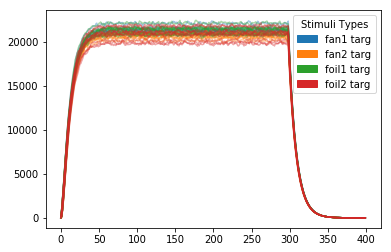

In [6]:
plt.plot(np.array(fan1_resp).T, alpha=0.4, color="C0")
plt.plot(np.array(fan2_resp).T, alpha=0.4, color="C1")
plt.plot(np.array(foil1_resp).T, alpha=0.4, color="C2")
plt.plot(np.array(foil2_resp).T, alpha=0.4, color="C3")

stim_types = ["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"]
leg_handles = [mpatches.Patch(color=f"C{a_i}", label=nm) for a_i, nm in enumerate(stim_types)]

plt.legend(handles=leg_handles, title="Stimuli Types")

In [7]:
filt = nengo.Lowpass(0.01)

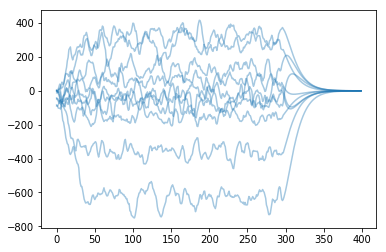

In [8]:
for f1, f2 in zip(fan1_resp, foil1_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

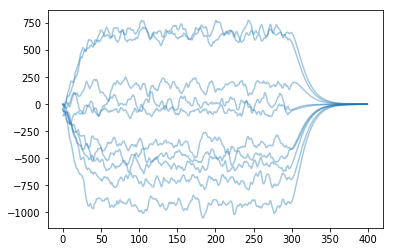

In [9]:
for f1, f2 in zip(fan2_resp, foil2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

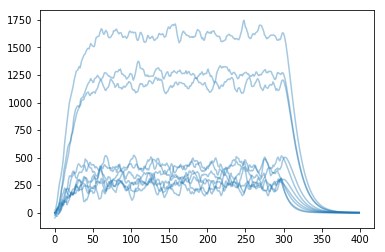

In [10]:
for f1, f2 in zip(fan1_resp, fan2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

In [45]:
read_path = os.path.join(data_path, "neg_voja")

In [46]:
fan1_resp = []
fan2_resp = []
foil1_resp = []
foil2_resp = []

for seed_val in range(10):
    with h5py.File(os.path.join(read_path, f"neg_voja_{seed_val}.h5"), "r") as fi:
        fan1_resp.append(np.array(fi["resp/fan1"]))
        fan2_resp.append(np.array(fi["resp/fan2"]))
        foil1_resp.append(np.array(fi["resp/foil1"]))
        foil2_resp.append(np.array(fi["resp/foil2"]))

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


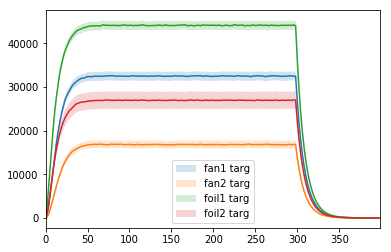

In [29]:
sns.tsplot(fan1_resp, color="C0")
sns.tsplot(fan2_resp, color="C1")
sns.tsplot(foil1_resp, color="C2")
sns.tsplot(foil2_resp, color="C3")

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


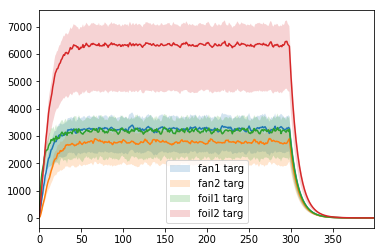

In [47]:
sns.tsplot(fan1_resp, color="C0", estimator=np.std)
sns.tsplot(fan2_resp, color="C1", estimator=np.std)
sns.tsplot(foil1_resp, color="C2", estimator=np.std)
sns.tsplot(foil2_resp, color="C3", estimator=np.std)

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

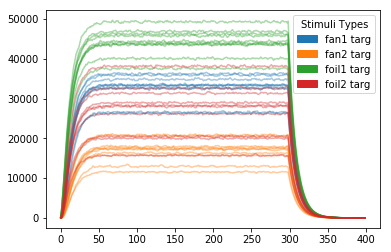

In [30]:
plt.plot(np.array(fan1_resp).T, alpha=0.4, color="C0")
plt.plot(np.array(fan2_resp).T, alpha=0.4, color="C1")
plt.plot(np.array(foil1_resp).T, alpha=0.4, color="C2")
plt.plot(np.array(foil2_resp).T, alpha=0.4, color="C3")

stim_types = ["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"]
leg_handles = [mpatches.Patch(color=f"C{a_i}", label=nm) for a_i, nm in enumerate(stim_types)]

plt.legend(handles=leg_handles, title="Stimuli Types")

In [31]:
filt = nengo.Lowpass(0.01)

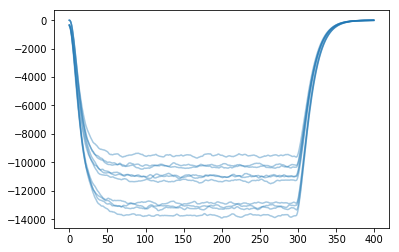

In [32]:
for f1, f2 in zip(fan1_resp, foil1_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

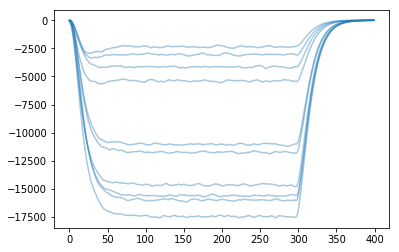

In [33]:
for f1, f2 in zip(fan2_resp, foil2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

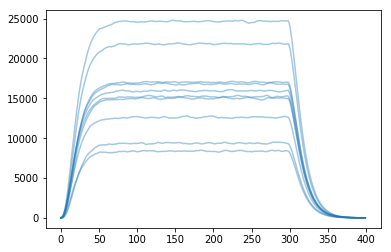

In [34]:
for f1, f2 in zip(fan1_resp, fan2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")